In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate
from tqdm import tqdm
from matplotlib import ticker, cm

In [2]:
def listas(N, M, dxy):
    """
    Genera y devuelve listas de coordenadas a lo largo de los ejes x y y, así como las
    dimensiones de la cuadrícula en las direcciones x (a) y y (b).

    Parámetros:
    N (int): Número de puntos a lo largo del eje x.
    M (int): Número de puntos a lo largo del eje y.
    dxy (float): Tamaño del paso tanto para las direcciones x como y.

    Devuelve:
    tuple: Contiene cuatro elementos - x (array de numpy), y (array de numpy), a (float), y b (float).
    """
    a = N * dxy
    b = M * dxy
    x = np.linspace(0, a, N)
    y = np.linspace(0, b, M)
    return x, y, a, b

def potencial(N, M, Vxi, Vxf, Vyi, Vyf):
    """
    Inicializa una cuadrícula 2D para valores de potencial, estableciendo los valores límite según las condiciones dadas.

    Parámetros:
    N (int): Número de puntos de la cuadrícula a lo largo del eje x.
    M (int): Número de puntos de la cuadrícula a lo largo del eje y.
    Vxi (float): Potencial en el límite izquierdo.
    Vxf (float): Potencial en el límite derecho.
    Vyi (float): Potencial en el límite inferior.
    Vyf (float): Potencial en el límite superior.

    Devuelve:
    numpy.ndarray: Array 2D de valores de potencial inicializados con condiciones de frontera.
    """
    V = np.zeros((N, M))
    V[0, :] = Vxi
    V[-1, :] = Vxf
    V[:, 0] = Vyi
    V[:, -1] = Vyf
    return V

def relajacion(V, N, M, tolerance=1e-4):
    """
    Realiza el método de relajación para resolver la ecuación de Laplace en una cuadrícula 2D.

    Parámetros:
    V (numpy.ndarray): Array 2D de valores iniciales de potencial, incluyendo condiciones de frontera.
    N (int): Número de puntos de la cuadrícula a lo largo del eje x.
    M (int): Número de puntos de la cuadrícula a lo largo del eje y.
    tolerance (float): El cambio máximo permitido entre iteraciones para la convergencia.

    Devuelve:
    numpy.ndarray: Array 2D de valores de potencial después de aplicar el método de relajación.
    """
    for i in tqdm(range(int(1e4))):
        V_u = V.copy()
        V_u[1:-1, 1:-1] = 0.25 * (V[2:, 1:-1] + V[:-2, 1:-1] + V[1:-1, 2:] + V[1:-1, :-2])

        if np.abs(V_u - V).max() < tolerance:
            break

        V = V_u

    return V
Vxi, Vxf, Vyi, Vyf, N, M, dxy = 0, 0, -1, 1, 10, 10, 0.1
x, y, a, b = listas(N, M, dxy)
Vc = potencial(N, M, Vxi, Vxf, Vyi, Vyf)
Vc = relajacion(Vc, N, M)

  0%|          | 43/10000 [00:00<00:01, 8535.90it/s]


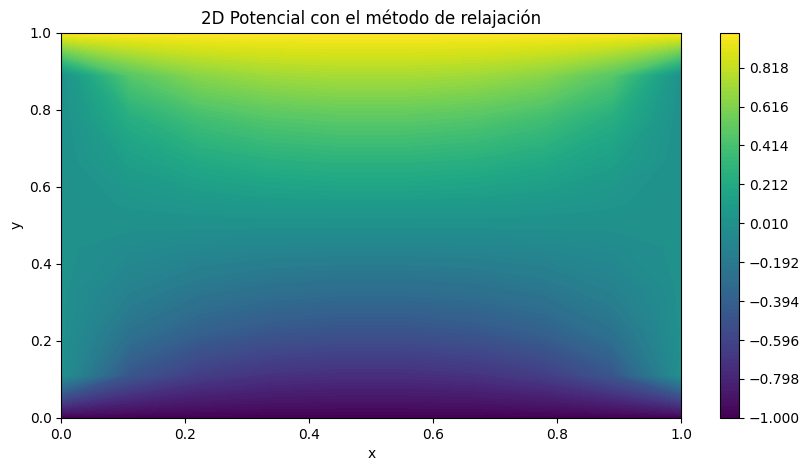

In [3]:
def grafica_potencial(Vc, x, y):
    """
    Traza el potencial 2D utilizando un gráfico de contorno.

    Parámetros:
    Vc (numpy.ndarray): Array 2D de valores de potencial que se trazarán.
    x (numpy.ndarray): Array de coordenadas x.
    y (numpy.ndarray): Array de coordenadas y.
    """
    X, Y = np.meshgrid(x, y)
    levels = np.linspace(Vc.min() - 1e-5, Vc.max() + 1e-5, 100)
    fig, ax = plt.subplots(figsize=(10, 5))
    contour = ax.contourf(X, Y, Vc.T, levels=levels)
    plt.colorbar(contour)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("2D Potencial con el método de relajación")
    plt.show()

grafica_potencial(Vc, x, y)

In [4]:
def analitica(x,y,v0,a,b):
    """
    Calcula la solución analítica para el potencial 2D en un dominio rectangular.

    Parámetros:
    x (numpy.ndarray): Array de coordenadas x.
    y (numpy.ndarray): Array de coordenadas y.
    v0 (float): Factor de escala para el potencial.
    a (float): Longitud del dominio en la dirección x.
    b (float): Longitud del dominio en la dirección y.

    Devuelve:
    numpy.ndarray: Array 2D que representa la solución analítica del potencial.
    """
    X,Y = np.meshgrid(x,y)
    Va = np.zeros_like(X)

    for n in range(1,100,2):
        Const = (1 + np.cosh(n*np.pi*b/a))/(np.sinh(n*np.pi*b/a))
        Va += (Const*np.sinh(n*np.pi*X/a) - np.cosh(n*np.pi*X/a))*np.sin(n*np.pi*Y/a)/n
        V = (4*v0/np.pi)*Va
    return V

Va = analitica(x,y,1,a,b)

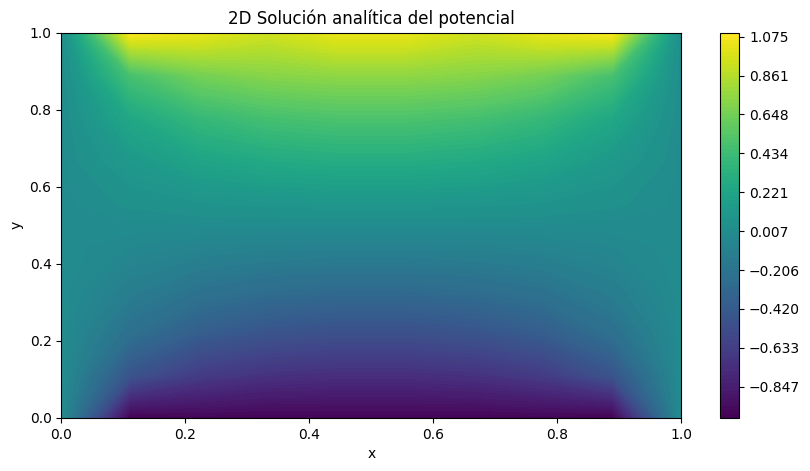

In [5]:
def grafica_analitica(Va, x, y):
    """
    Traza la solución analítica 2D del potencial utilizando un gráfico de contorno.

    Parámetros:
    Va (numpy.ndarray): Array 2D de valores de potencial analíticos que se trazarán.
    x (numpy.ndarray): Array de coordenadas x.
    y (numpy.ndarray): Array de coordenadas y.
    """
    X, Y = np.meshgrid(x, y)
    levels = np.linspace(Va.min() - 1e-5, Va.max() + 1e-5, 100)
    fig, ax = plt.subplots(figsize=(10, 5))
    contour = ax.contourf(X, Y, Va.T, levels=levels)
    plt.colorbar(contour)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("2D Solución analítica del potencial")
    plt.show()

grafica_analitica(Va, x, y)

In [6]:
def error(Va, Vc):
    """
    Calcula el error absoluto medio y el error cuadrático medio entre dos conjuntos de valores de potencial.

    Parámetros:
    Va (numpy.ndarray): Array 2D de valores de potencial analíticos.
    Vc (numpy.ndarray): Array 2D de valores de potencial calculados.

    Devuelve:
    tuple: Contiene dos elementos - error absoluto medio (float) y error cuadrático medio (float).
    """
    errr = np.mean(np.abs(Va - Vc))
    cuadrado = np.mean((Va - Vc) ** 2)
    return errr, cuadrado

uno, dos = error(Va, Vc)
print("Error absoluto promedio:", uno)
print("Error al cuadrado:", dos)

Error absoluto promedio: 0.046977872729991786
Error al cuadrado: 0.040314422543164315
